# **Needed Libraries**


In [1]:
# Data science 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning
import pickle
from sklearn.mixture import GaussianMixture
# Single cell 
import scanpy as sc
# Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size': 17})
# Output control
import warnings
warnings.filterwarnings("ignore")

We load the example gmm model saved in the last part of the previous stage and our example dataset


In [2]:
filename  = "models/example_gmm.pkl"
with open(filename, "rb") as file:
    example_gmm = pickle.load(file)

adata = sc.read("processed_datasets/dataset1.h5ad")
optimal_pca_component = 2

example_gmm

GaussianMixture(init_params='k-means++', max_iter=500, n_components=2,
                random_state=67)

# **Stage 4: Visualization**


## **Basic attributes of GMMs**


While it was sufficient to plot the GMM components to demonstrate our results in the previous stage. In order to truly understand the results of the GMM models, it is essential to understand their attributes to create a convincing visualization.


A Gaussian mixture model assumes that the data is generated by a mixture of Gaussian components. In the case of multivariate components, after fitting it to the data its probability density function (PDF) is represented by the following equation:
$$P(\vec{x}) = \sum_{i=1}^{k} w_i \cdot \mathcal{N}(\vec{x}| \vec{\mu_i}, \Sigma_i)$$

- $w_i$ represents the weight coefficient of each of the $k$ components that constitute the mixture, we can get this information by callaing `example_gmm.weights_`. As you can see below our example model from the previous stage has a component with a small weight and two other with realtively similar weights. Of course the mixing coefients should sum up to one.


In [3]:
example_gmm.weights_

array([0.33256756, 0.66743244])

- $\vec{\mu_i}$ are the means of each of the distribution components. These can be accessed through `example_gmm.means_`. By examining these means, we can understand the location or position of each component in the representation space.


In [4]:
example_gmm.means_

array([[ 4.16531354,  0.28963972],
       [-2.07548817, -0.1443213 ]])

- $\Sigma_i$ represents the covariance matrix of each component, capturing the spread, shape, and orientation of the Gaussian distribution. This information is available through `example_gmm.covariances_`. In the example model we have **full covariance**, this means that each component of the GMM has its own covariance matrix as shown below. Of course this type of covariance has the most parameters.


In [5]:
example_gmm.covariances_

array([[[ 3.6070355 ,  0.86614822],
        [ 0.86614822,  2.08453063]],

       [[ 6.60033483, -1.33226495],
        [-1.33226495,  1.66470489]]])

other cases in decreasing order of number of parameters are:

- Tied Covariance:
  With tied covariance, all components of the GMM share a single covariance matrix. This assumption implies that all the Gaussian distributions have the same spread, shape, and orientation.

- Diagonal Covariance:
  In this case, each component of the GMM has its own covariance matrix, but the matrices are constrained to be diagonal. This means that the variables are assumed to be independent, and there are no correlations between them within each Gaussian distribution.

- Spherical Covariance:
  Spherical covariance assumes that all components of the GMM have the same isotropic covariance matrix. This implies that the spread is the same along all axes, and there are no correlations or variations in shape and orientation.


## **Conditional and joint probabilites**


### _Conditional probabilities_


The conditional probability of each cell, given a component distribution represented by $p(\vec{x}|c_i)$, can be obtained using the `example_gmm.predict_proba(X)` function. This function returns a matrix of size (cells, components), where each value in a column represents the conditional probability of a cell belonging to a specific mixture component.


In [6]:
X = adata.obsm['X_pca'][:,:optimal_pca_component]
conditionals = example_gmm.predict_proba(X)
conditionals.shape

(199, 2)

In [7]:
conditionals = example_gmm.predict_proba(X)

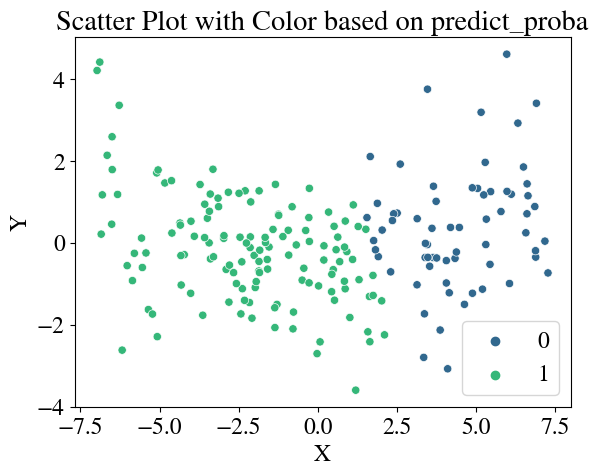

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already calculated gmms.conditionals using example_gmm.predict_proba(X)

# Generate some example data for x and y coordinates
# Get the values from gmms.conditionals to determine the colors
# Replace `gmms.conditionals` with your actual variable name
values = np.argmax(conditionals, axis=1)
# Create the scatter plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=values, palette="viridis")
# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Color based on predict_proba')
unique_values = np.unique(values)
# Show the plot
plt.show()
